# 6.2 Exploring Relationships

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
#this option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
#establishing a path
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Data Immersion\Achievement 6 - IndeGo BikeShare'

In [5]:
#importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_data_full.pkl'))

In [6]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,...,passholder_type,bike_type,start_station_name,end_station_name,trip_category_code,bike_type_code,start_date,start_time_of_day,end_date,end_time_of_day
0,579507686,70,2023-01-01 00:00:00,2023-01-01 01:10:00,3063,39.946331,-75.169800,3063,39.946331,-75.169800,...,Indego365,electric,17th & Pine,17th & Pine,0,1,2023-01-01,00:00:00,2023-01-01,01:10:00
1,579499091,17,2023-01-01 00:05:00,2023-01-01 00:22:00,3190,39.948921,-75.169907,3207,39.954411,-75.192001,...,Indego30,standard,17th & Locust,34th & Chestnut,1,0,2023-01-01,00:05:00,2023-01-01,00:22:00
2,579499089,11,2023-01-01 00:06:00,2023-01-01 00:17:00,3182,39.950809,-75.169533,3102,39.967590,-75.179520,...,Indego30,electric,17th & Sansom,Pennsylvania & Fairmount Perelman Building,1,1,2023-01-01,00:06:00,2023-01-01,00:17:00
3,579499087,1,2023-01-01 00:08:00,2023-01-01 00:09:00,3026,39.941818,-75.145500,3026,39.941818,-75.145500,...,Indego30,electric,2nd & Lombard,2nd & Lombard,0,1,2023-01-01,00:08:00,2023-01-01,00:09:00
4,579499085,27,2023-01-01 00:09:00,2023-01-01 00:36:00,3046,39.950119,-75.144722,3112,39.953732,-75.218246,...,Indego30,electric,2nd & Market,48th & Spruce,1,1,2023-01-01,00:09:00,2023-01-01,00:36:00


In [7]:
df.shape

(1084547, 23)

In [8]:
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_station_name', 'end_station_name',
       'trip_category_code', 'bike_type_code', 'start_date',
       'start_time_of_day', 'end_date', 'end_time_of_day'],
      dtype='object')

### Checking Data Types

In [10]:
df.dtypes

trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                         int64
plan_duration                   int64
trip_route_category            object
passholder_type                object
bike_type                      object
start_station_name             object
end_station_name               object
trip_category_code              int64
bike_type_code                  int64
start_date                     object
start_time_of_day              object
end_date                       object
end_time_of_day                object
dtype: object

### Correlations

In [12]:
#create a subset of comparable variables
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_station_name', 'end_station_name',
       'trip_category_code', 'bike_type_code', 'start_date',
       'start_time_of_day', 'end_date', 'end_time_of_day'],
      dtype='object')

In [13]:
# Create a subset of only numerical columns

subset = df[['duration', 'start_time', 'end_time', 'plan_duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon']]

In [14]:
# comparing correlations
subset.corr()

,duration,start_time,end_time,plan_duration,start_lat,start_lon,end_lat,end_lon
duration,1.000000,-0.007084,-0.006543,-0.063364,0.045859,-0.010209,0.052322,-0.015289
start_time,-0.007084,1.000000,1.000000,-0.002452,0.001337,0.005426,0.001506,0.002837
end_time,-0.006543,1.000000,1.000000,-0.002478,0.001354,0.005423,0.001523,0.002832
plan_duration,-0.063364,-0.002452,-0.002478,1.000000,-0.093977,-0.006445,-0.092654,-0.005585
start_lat,0.045859,0.001337,0.001354,-0.093977,1.000000,-0.115015,0.581030,-0.077299
start_lon,-0.010209,0.005426,0.005423,-0.006445,-0.115015,1.000000,-0.075147,0.586660
end_lat,0.052322,0.001506,0.001523,-0.092654,0.581030,-0.075147,1.000000,-0.112803
end_lon,-0.015289,0.002837,0.002832,-0.005585,-0.077299,0.586660,-0.112803,1.000000


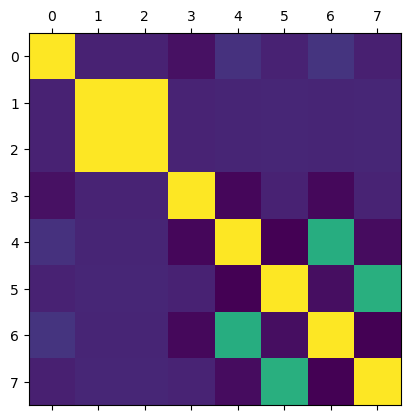

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(subset.corr())
plt.show()

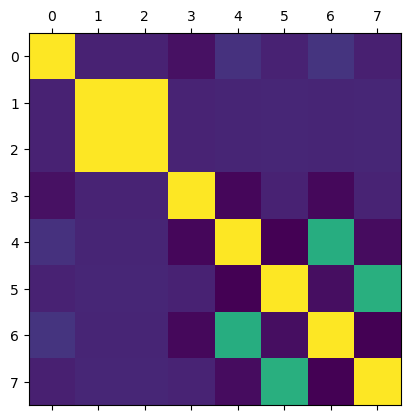

In [16]:
# Save figure
plt.matshow(subset.corr())
plt.savefig("out.png") 

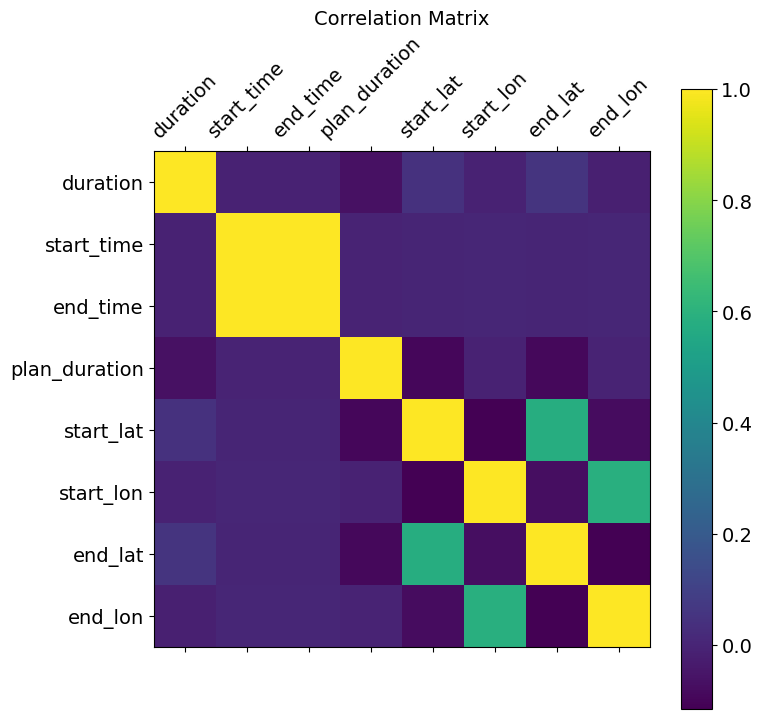

In [17]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(subset.corr(), fignum=f.number) # type of plot
plt.xticks(range(subset.shape[1]), subset.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(subset.shape[1]), subset.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
# Save figure
plt.savefig("heatmap.png") 

There seems to be very little correlation between any of the variables. However, there is some correlation between latitude and longitude because they are so close together.

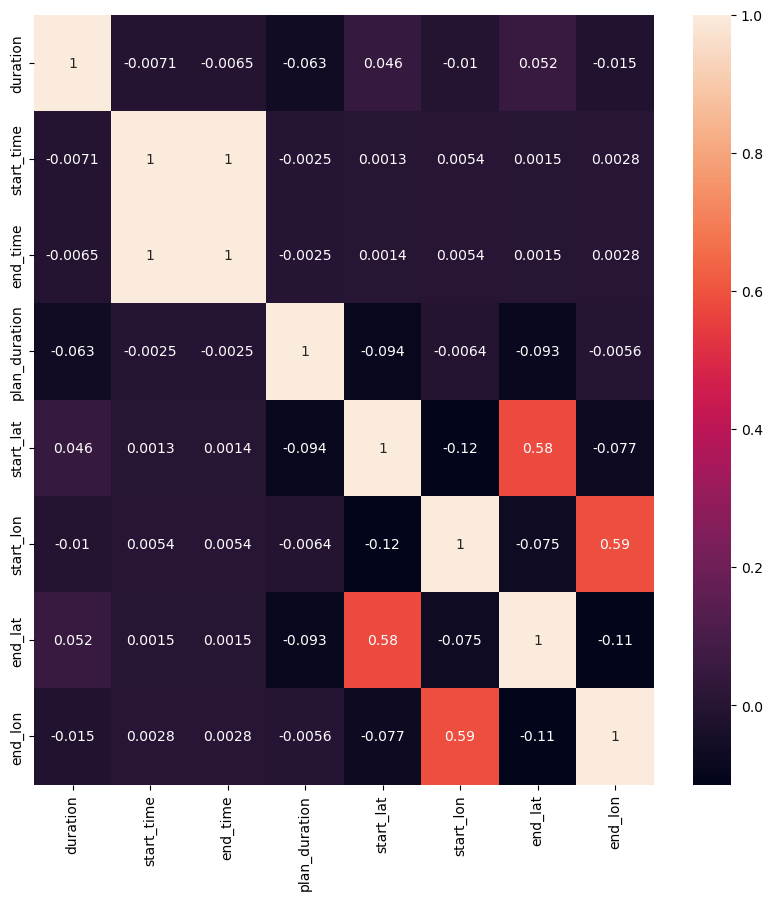

In [19]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Save figure
plt.savefig("heatmap seaborn.png") 

The strongest correlation is between latitude and longitude, because they are so close together.

### Scatterplots.

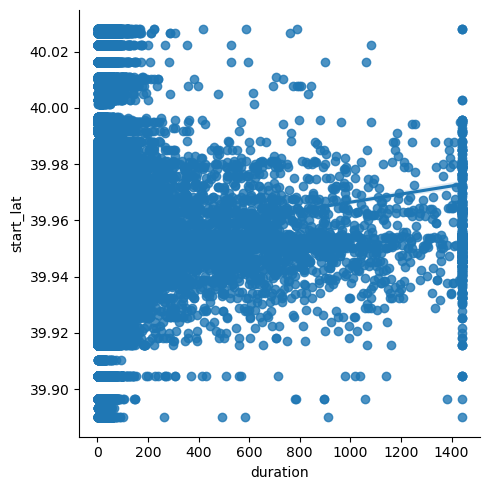

In [22]:
# Create a scatterplot
sns.lmplot(x = 'duration', y = 'start_lat', data = subset)
# Save figure
plt.savefig("scatterplot.png") 

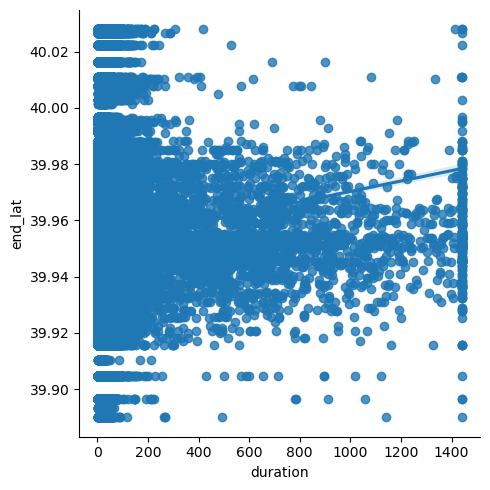

In [23]:
# Create another scatterplot
sns.lmplot(x = 'duration', y = 'end_lat', data = subset)

In [24]:
# Create the complete path using os.path.join
full_path = os.path.join(path, "04 Analysis", "Visualizations", "scatterplot2_duration_endlat.png")

In [25]:
# Save figure
plt.savefig(full_path) 

<Figure size 640x480 with 0 Axes>

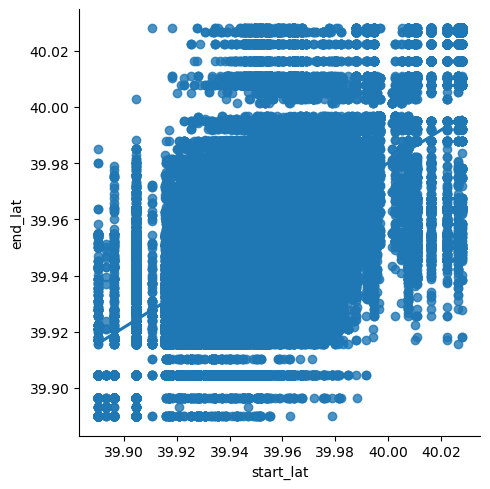

In [26]:
# Create another scatterplot
sns.lmplot(x = 'start_lat', y = 'end_lat', data = subset)

In [27]:
# Create the complete path using os.path.join
full_path2 = os.path.join(path, "04 Analysis", "Visualizations", "scatterplot3 startlat/endlat.png")

In [28]:
# Save figure
plt.savefig("full_path2") 

<Figure size 640x480 with 0 Axes>

### Pair Plots

In [30]:
#create smaller subset for pair plot
subset2 = df[['duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon']]

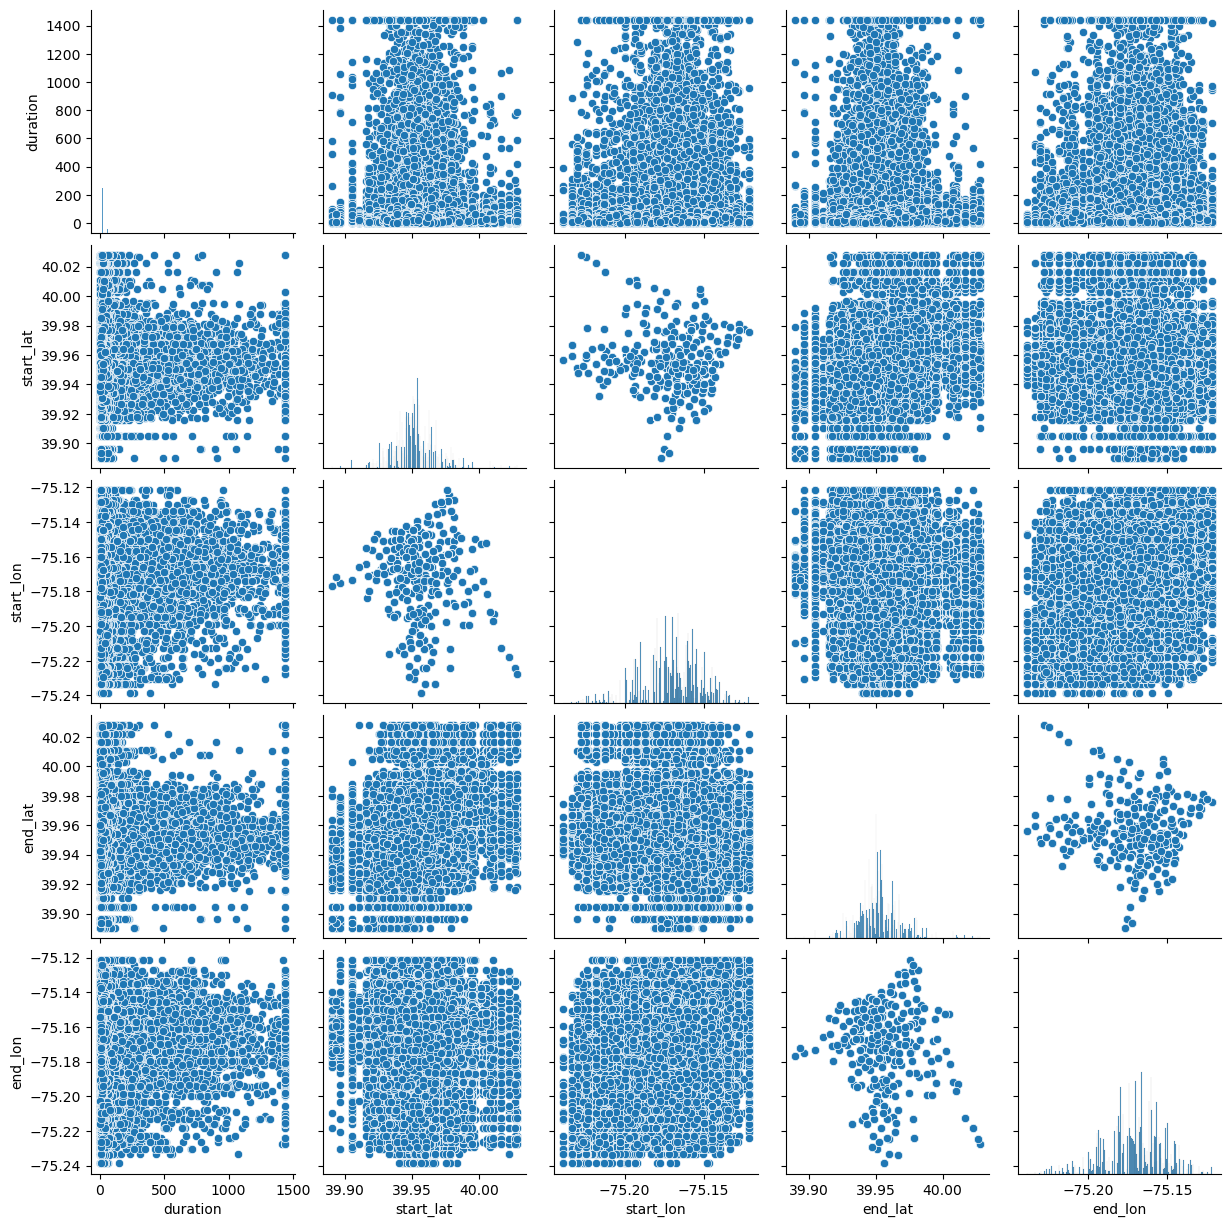

In [31]:
# Create a pair plot 

g = sns.pairplot(subset2)
# Save figure
plt.savefig("pairplot.png") 

This is a lot to take in. I think a map will be a better was to digest this information.

### Categorical Plots

In [34]:
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_station_name', 'end_station_name',
       'trip_category_code', 'bike_type_code', 'start_date',
       'start_time_of_day', 'end_date', 'end_time_of_day'],
      dtype='object')

C:\Users\harkn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


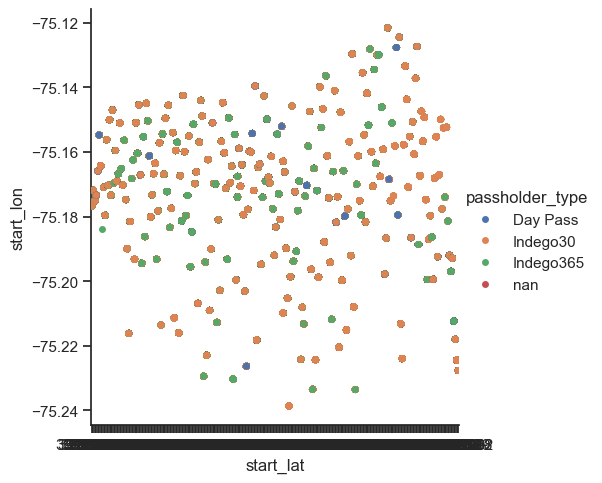

In [35]:
# Create a categorical plot in seaborn using the plan type categories created above

sns.set(style="ticks")
g = sns.catplot(x="start_lat", y="start_lon", hue="passholder_type", data=df)

# Save figure
plt.savefig("categorical plot.png") 

### Saving dataframe

In [38]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,...,passholder_type,bike_type,start_station_name,end_station_name,trip_category_code,bike_type_code,start_date,start_time_of_day,end_date,end_time_of_day
0,579507686,70,2023-01-01 00:00:00,2023-01-01 01:10:00,3063,39.946331,-75.169800,3063,39.946331,-75.169800,...,Indego365,electric,17th & Pine,17th & Pine,0,1,2023-01-01,00:00:00,2023-01-01,01:10:00
1,579499091,17,2023-01-01 00:05:00,2023-01-01 00:22:00,3190,39.948921,-75.169907,3207,39.954411,-75.192001,...,Indego30,standard,17th & Locust,34th & Chestnut,1,0,2023-01-01,00:05:00,2023-01-01,00:22:00
2,579499089,11,2023-01-01 00:06:00,2023-01-01 00:17:00,3182,39.950809,-75.169533,3102,39.967590,-75.179520,...,Indego30,electric,17th & Sansom,Pennsylvania & Fairmount Perelman Building,1,1,2023-01-01,00:06:00,2023-01-01,00:17:00
3,579499087,1,2023-01-01 00:08:00,2023-01-01 00:09:00,3026,39.941818,-75.145500,3026,39.941818,-75.145500,...,Indego30,electric,2nd & Lombard,2nd & Lombard,0,1,2023-01-01,00:08:00,2023-01-01,00:09:00
4,579499085,27,2023-01-01 00:09:00,2023-01-01 00:36:00,3046,39.950119,-75.144722,3112,39.953732,-75.218246,...,Indego30,electric,2nd & Market,48th & Spruce,1,1,2023-01-01,00:09:00,2023-01-01,00:36:00


In [39]:
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_station_name', 'end_station_name',
       'trip_category_code', 'bike_type_code', 'start_date',
       'start_time_of_day', 'end_date', 'end_time_of_day'],
      dtype='object')

In [40]:
#export cleaned dataframe to pickle
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', '11-6_cleaned_data_full.pkl'))